In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [2]:
df = pd.read_csv('boston.csv')

In [3]:
print("Null values in dataset:")
print(df.isnull().sum())
print("\nDataset preview:")
print(df.head())

Null values in dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Dataset preview:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
X = df.drop(columns=['MEDV']) 
y = df['MEDV'] 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\nStandard Linear Regression:")
print(f'MSE: {mse_lr}')
print(f'R²: {r2_lr}')
print(f'RMSE: {rmse_lr}')


Standard Linear Regression:
MSE: 24.291119474973538
R²: 0.6687594935356317
RMSE: 4.928602182665339


In [7]:
model_lasso = Lasso(alpha=0.1) 
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

In [8]:
print("\nLasso Regression:")
print(f'MSE: {mse_lasso}')
print(f'R²: {r2_lasso}')
print(f'RMSE: {rmse_lasso}')


Lasso Regression:
MSE: 25.155593753934173
R²: 0.6569712802223936
RMSE: 5.015535241022056


In [10]:
model_ridge = Ridge(alpha=0.1) 
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRidge Regression:")
print(f'MSE: {mse_ridge}')
print(f'R²: {r2_ridge}')
print(f'RMSE: {rmse_ridge}')


Ridge Regression:
MSE: 24.301025500192736
R²: 0.6686244122021412
RMSE: 4.929607033039524


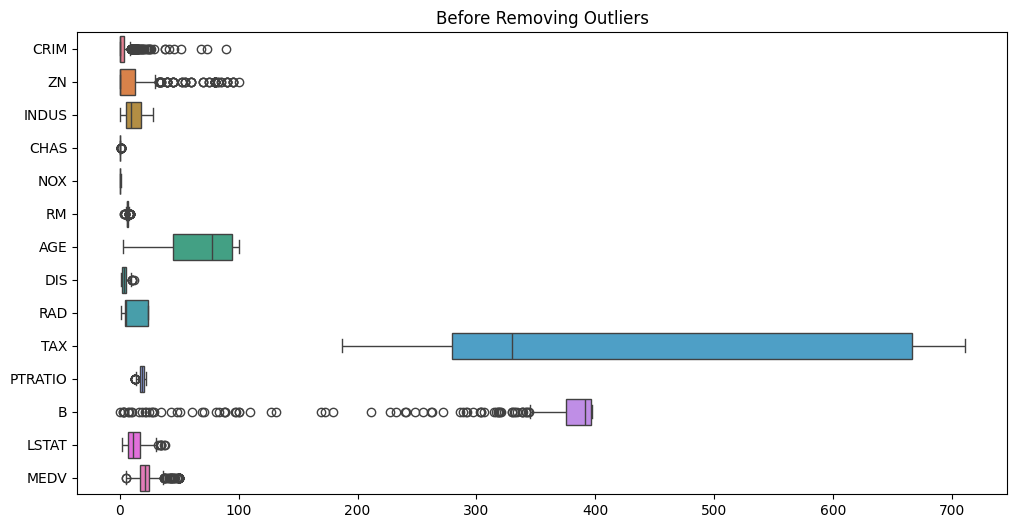

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Before Removing Outliers")
plt.show()

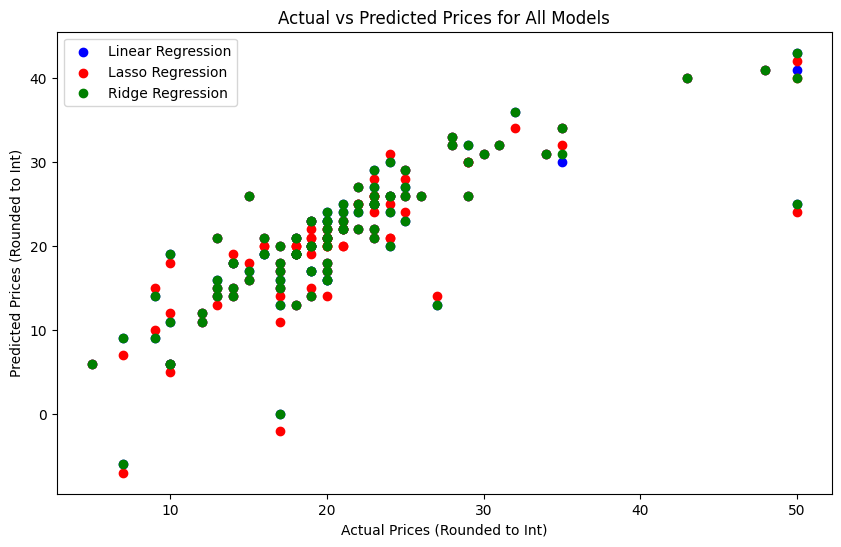

In [12]:
y_pred_lr_int = np.round(y_pred_lr).astype(int)
y_pred_lasso_int = np.round(y_pred_lasso).astype(int)
y_pred_ridge_int = np.round(y_pred_ridge).astype(int)
y_test_int = y_test.astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_int, y_pred_lr_int, color='blue', label='Linear Regression')
plt.scatter(y_test_int, y_pred_lasso_int, color='red', label='Lasso Regression')
plt.scatter(y_test_int, y_pred_ridge_int, color='green', label='Ridge Regression')
plt.xlabel('Actual Prices (Rounded to Int)')
plt.ylabel('Predicted Prices (Rounded to Int)')
plt.legend()
plt.title('Actual vs Predicted Prices for All Models')
plt.show()